In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


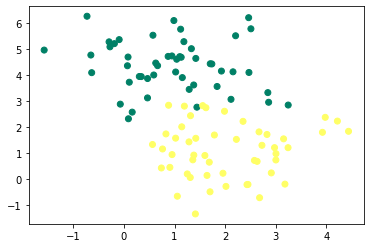

In [37]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

#Ce code utilise la bibliothèque scikit-learn et la bibliothèque matplotlib pour générer et visualiser un ensemble de données synthétiques.

#1. `make_blobs`: C'est une fonction de scikit-learn qui génère un ensemble de données en forme de grappes (blobs). Les paramètres `n_samples`, `n_features` et `random_state` spécifient respectivement le nombre d'échantillons (100 dans ce cas), le nombre de caractéristiques par échantillon (2 dans ce cas) et la graine aléatoire pour la reproductibilité des données.

#2. `X, y = make_blobs(n_samples=100, n_features=2, random_state=0)`: Cette ligne de code appelle la fonction `make_blobs` avec les paramètres spécifiés et assigne les données générées à deux variables, `X` et `y`. `X` contient les caractéristiques (les coordonnées x, y dans cet exemple) des échantillons, et `y` contient les étiquettes de classe correspondantes pour chaque échantillon.

#3. `y = y.reshape((y.shape[0], 1))`: Cette ligne de code ajuste la forme de `y` pour s'assurer qu'elle est un tableau 2D avec une seule colonne. Cela est nécessaire pour certaines opérations ultérieures.

#4. `print('dimension de X : ', X.shape)`: Cette ligne affiche la dimension de la matrice `X`, c'est-à-dire le nombre d'échantillons et le nombre de caractéristiques.

#5. `print('dimension de y : ', y.shape)`: Cette ligne affiche la dimension de la matrice `y`, c'est-à-dire le nombre d'échantillons et le nombre de colonnes (qui est maintenant 1 après le reshape).

#6. `plt.scatter(X[:,0], X[:, 1], c=y, cmap= 'summer')`: Cette ligne utilise la fonction scatter de matplotlib pour créer un diagramme de dispersion. Les coordonnées x sont extraites de la première colonne de `X` (`X[:,0]`) et les coordonnées y sont extraites de la deuxième colonne de `X` (`X[:,1]`). Les couleurs des points sont déterminées par les étiquettes `y`, et le paramètre `cmap='summer'` spécifie la carte de couleurs à utiliser.

#7. `plt.show()`: Cette ligne affiche le diagramme de dispersion.

#En résumé, ce code génère un ensemble de données synthétiques avec deux caractéristiques et les affiche sous forme d'un diagramme de dispersion, en utilisant différentes couleurs pour représenter les différentes étiquettes de classe. Cela permet de visualiser les données et de comprendre leur répartition spatiale.

In [38]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

#La fonction `initialisation` prend en paramètre `x` et effectue l'initialisation des poids et du biais pour une tâche d'apprentissage automatique.

#Voici ce que fait cette fonction :

#1. `W = np.random.randn(X.shape[1], 1)`: Cette ligne utilise la fonction `np.random.randn` de la bibliothèque NumPy pour générer une matrice de poids aléatoires `W`. La taille de cette matrice est déterminée par le nombre de caractéristiques de `X`, qui est extrait à partir de `X.shape[1]`. Les poids sont initialisés avec une distribution normale centrée sur zéro.

#2. `b = np.random.randn(1)`: Cette ligne génère un biais aléatoire `b` en utilisant `np.random.randn`. Le biais est un scalaire initialisé également avec une distribution normale centrée sur zéro.

#3. `return (W, b)`: Cette ligne retourne un tuple contenant la matrice de poids `W` et le biais `b`.

#En résumé, cette fonction initialise aléatoirement les poids (`W`) et le biais (`b`) utilisés dans un modèle d'apprentissage automatique. Les poids sont initialisés en fonction du nombre de caractéristiques de `X`, tandis que le biais est initialisé en tant que scalaire aléatoire.

In [39]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

#La fonction `model` prend en paramètres `X`, `W` et `b` et effectue le calcul de la sortie d'un modèle d'apprentissage automatique.

#Voici ce que fait cette fonction :

#1. `Z = X.dot(W) + b`: Cette ligne calcule la valeur intermédiaire `Z` en effectuant une multiplication matricielle entre `X` et `W`, puis en ajoutant le biais `b`. Cela correspond à l'étape de propagation avant (forward propagation) où les caractéristiques `X` sont pondérées par les poids `W` et additionnées au biais `b`.

#2. `A = 1 / (1 + np.exp(-Z))`: Cette ligne applique la fonction d'activation sigmoïde à `Z` pour obtenir la sortie `A`. La fonction sigmoïde transforme les valeurs de `Z` dans une plage de 0 à 1, ce qui est souvent utilisé pour représenter une probabilité. Cela permet de modéliser la sortie du modèle comme la probabilité d'appartenir à une classe donnée.

#3. `return A`: Cette ligne retourne la sortie `A` calculée par le modèle.

#En résumé, cette fonction implémente la propagation avant d'un modèle d'apprentissage automatique. Elle prend en entrée les caractéristiques `X`, les poids `W` et le biais `b`, et renvoie la sortie calculée `A` en appliquant une multiplication matricielle, une addition de biais et une fonction d'activation sigmoïde.#

In [40]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

#La fonction `log_loss` calcule la perte (loss) de logistique, également connue sous le nom d'entropie croisée binaire, entre la sortie prédite `A` et les étiquettes de classe réelles `y`.

#Voici ce que fait cette fonction :

#1. `np.log(A)`: Cette partie calcule le logarithme naturel des valeurs de la sortie prédite `A`. Cela est utilisé dans la formule de l'entropie croisée pour calculer la perte.

#2. `np.log(1 - A)`: Cette partie calcule le logarithme naturel des valeurs complémentaires de la sortie prédite `A` (c'est-à-dire 1 - A). Cela est également utilisé dans la formule de l'entropie croisée pour calculer la perte.

#3. `-y * np.log(A) - (1 - y) * np.log(1 - A)`: Cette partie calcule la perte de logistique en utilisant la formule de l'entropie croisée binaire. La perte est calculée pour chaque paire de valeur prédite `A` et étiquette réelle `y`. Lorsque `y` est égal à 1, seule la première partie `-y * np.log(A)` contribue à la perte, tandis que lorsque `y` est égal à 0, seule la deuxième partie `(1 - y) * np.log(1 - A)` contribue à la perte.

#4. `np.sum(...)`: Cette partie effectue la sommation de toutes les pertes calculées pour chaque paire de valeur prédite `A` et étiquette réelle `y`.

#5. `1 / len(y)`: Cette partie normalise la somme des pertes en divisant par le nombre total d'échantillons `len(y)`. Cela permet d'obtenir une mesure moyenne de la perte par échantillon.

#6. `return ...`: Cette ligne retourne la valeur calculée de la perte de logistique.

#En résumé, la fonction `log_loss` calcule la perte de logistique (entropie croisée binaire) entre la sortie prédite `A` et les étiquettes réelles `y`, en utilisant la formule de l'entropie croisée. Cela permet d'évaluer la qualité des prédictions d'un modèle d'apprentissage automatique dans une tâche de classification binaire.#

In [42]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

#La fonction `gradients` calcule les gradients de la perte par rapport aux poids `W` et au biais `b` d'un modèle d'apprentissage automatique. Les gradients sont utilisés pour mettre à jour les poids et le biais lors de l'entraînement du modèle par rétropropagation.

#Voici ce que fait cette fonction :

#1. `A - y`: Cette partie soustrait les étiquettes réelles `y` de la sortie prédite `A`. Cela représente la différence entre la sortie prédite par le modèle et les valeurs réelles attendues.

#2. `np.dot(X.T, A - y)`: Cette partie calcule le produit matriciel entre la transposée de la matrice de caractéristiques `X` et la différence `A - y`. Cela donne une matrice qui représente la contribution de chaque caractéristique à la perte.

#3. `1 / len(y)`: Cette partie normalise les gradients en divisant par le nombre total d'échantillons `len(y)`. Cela permet d'obtenir une mesure moyenne du gradient par échantillon.

#4. `np.sum(A - y)`: Cette partie effectue la sommation de la différence `A - y` pour obtenir une mesure agrégée de la contribution de la perte.

#5. `dW = ...`: Cette ligne assigne le résultat du calcul des gradients par rapport aux poids `W` à la variable `dW`.

#6. `db = ...`: Cette ligne assigne le résultat du calcul des gradients par rapport au biais `b` à la variable `db`.

#7. `return (dW, db)`: Cette ligne retourne un tuple contenant les gradients calculés `dW` et `db`.

#En résumé, la fonction `gradients` calcule les gradients de la perte par rapport aux poids `W` et au biais `b` d'un modèle d'apprentissage automatique. Ces gradients indiquent comment la perte évolue en fonction des variations des poids et du biais. Ces gradients sont utilisés pour ajuster les poids et le biais lors de l'entraînement du modèle afin de minimiser la perte.#

In [43]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

#La fonction `update` effectue la mise à jour des poids `W` et du biais `b` d'un modèle d'apprentissage automatique en utilisant des gradients calculés lors de la rétropropagation.

#Voici ce que fait cette fonction :

#1. `W = W - learning_rate * dW`: Cette ligne met à jour les poids `W` en soustrayant le produit du taux d'apprentissage (`learning_rate`) et des gradients `dW`. La mise à jour est effectuée selon la règle du gradient descendante, où les poids sont ajustés dans la direction opposée au gradient pour minimiser la perte.

#2. `b = b - learning_rate * db`: Cette ligne met à jour le biais `b` de manière similaire en soustrayant le produit du taux d'apprentissage (`learning_rate`) et du gradient `db`.

#3. `return (W, b)`: Cette ligne retourne un tuple contenant les nouveaux poids mis à jour `W` et le nouveau biais mis à jour `b`.

#En résumé, la fonction `update` effectue la mise à jour des poids `W` et du biais `b` en utilisant des gradients `dW` et `db` calculés lors de la rétropropagation. La mise à jour est effectuée en soustrayant le produit du taux d'apprentissage et des gradients de chaque paramètre. Cela permet d'ajuster les poids et le biais du modèle dans la direction qui réduit la perte lors de l'entraînement.#

In [44]:
from sklearn.metrics import accuracy_score
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

In [59]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [57]:
from sklearn.metrics import accuracy_score

0.92


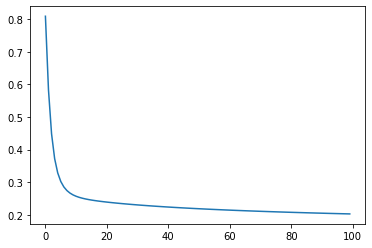

In [58]:
W, b = artificial_neuron(X, y)

In [48]:
W, b


(array([[ 0.96310797],
        [-1.04973425]]),
 array([0.98760119]))

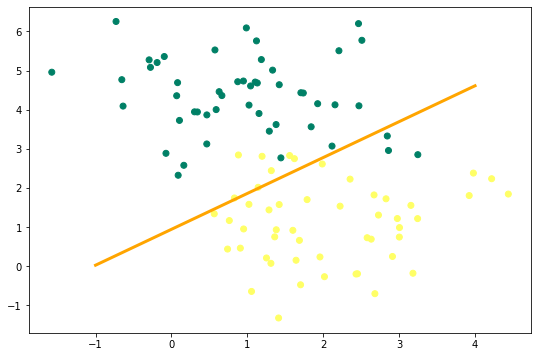

In [49]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

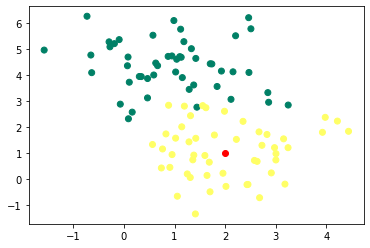

[0.90083835]


array([ True])

In [60]:
new_plant = np.array([2, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, W, b)
#on veut savoir si les données de notre plante conclue si elle est toxique ou pas 

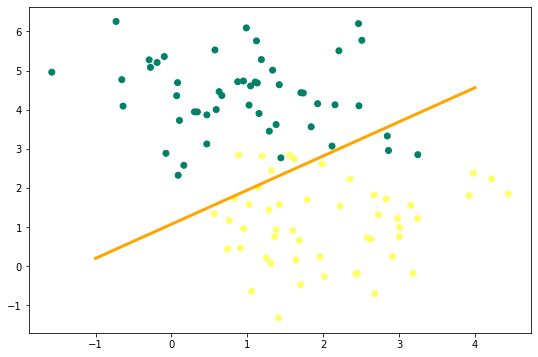

In [63]:
#Frontière de décison

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)